## Final Project Submission

**Name: Jessica Rodriguez**

**Student Pace: Self-Paced**

**Project Review Date: Tuesday September 7th at 4:00 pm**

**Instructor Name: Jeff Herman**

**Blog Post URL:**

# Movies at Microsoft
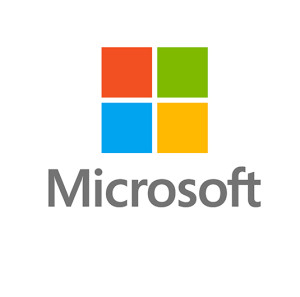

# Overview

## Microsoft has decided to create their own movie studio. However, they have no working knowledge of the movie industry and need guidance to create profitable content.
## In this presentation, I will analyze past movie data to help Microsoft meet this goal.

### The following questions will be addressed:
1.) What are the production budgets and release dates of the top 10 most profitable movies?

2.) When is the best time of year to release a movie?

3.) Which movie budgets yield the highest profits?

### Data:
The data file 'tn.movie_budgets.csv.gz' provides information about the finanaces of more than 5,000 films, including production budgets and worldwide and domestic profits. It also includes general information about each movie-such as its name and release date.

### Methods:
The following Python libraries are used to analyze and display data: Pandas, Matplotlib and Numpy.


In [44]:
# Import the necessary libraries to examine and display data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [45]:
# Examine the data set's columns and rows-what information does it contain, and how can we use it?
df_info = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
df_info.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [46]:
# Review the columns and thier datatypes
df_info.info

<bound method DataFrame.info of       id  release_date                                        movie  \
0      1  Dec 18, 2009                                       Avatar   
1      2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2      3   Jun 7, 2019                                 Dark Phoenix   
3      4   May 1, 2015                      Avengers: Age of Ultron   
4      5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   
...   ..           ...                                          ...   
5777  78  Dec 31, 2018                                       Red 11   
5778  79   Apr 2, 1999                                    Following   
5779  80  Jul 13, 2005                Return to the Land of Wonders   
5780  81  Sep 29, 2015                         A Plague So Pleasant   
5781  82   Aug 5, 2005                            My Date With Drew   

     production_budget domestic_gross worldwide_gross  
0         $425,000,000   $760,507,625  $2,776,345,279  
1  

## Data Cleaning
To prepare data for visualization, adjust columns as needed.

In [47]:
df_info['production_budget'] = df_info['production_budget'].str.replace(',','')
df_info['production_budget'] = df_info['production_budget'].str.replace('$','')

In [48]:
df_info['production_budget'] = df_info['production_budget'].astype(float)

In [49]:
df_info['worldwide_gross'] = df_info['worldwide_gross'].str.replace(',','')
df_info['worldwide_gross'] = df_info['worldwide_gross'].str.replace('$','')



In [50]:
df_info['worldwide_gross'] = df_info['worldwide_gross'].astype(float)

In [51]:
df_info['domestic_gross'] = df_info['domestic_gross'].str.replace(',','')
df_info['domestic_gross'] = df_info['domestic_gross'].str.replace('$','')

In [52]:
df_info['domestic_gross'] = df_info['domestic_gross'].astype(float)

In [53]:
#Convert 'release_date' column to datetime (this will make it easier to graph the data)
df_info['release_date'] = pd.to_datetime(df_info['release_date'])

In [54]:
#Create a new column in the dataset called "month"
df_info['month'] = df_info['release_date'].dt.month

In [55]:
df_info[df_info['movie']=='Beauty and the Beast']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,month
134,35,2017-03-17,Beauty and the Beast,160000000.000,504014165.000,1259199706.000,3
2485,86,1991-11-13,Beauty and the Beast,20000000.000,376057266.000,608431132.000,11


In [56]:
df_info.drop(2485, inplace = True)

In [57]:
df_info.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,month
0,1,2009-12-18,Avatar,425000000.000,760507625.000,2776345279.000,12
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.000,241063875.000,1045663875.000,5
2,3,2019-06-07,Dark Phoenix,350000000.000,42762350.000,149762350.000,6
3,4,2015-05-01,Avengers: Age of Ultron,330600000.000,459005868.000,1403013963.000,5
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.000,620181382.000,1316721747.000,12


In [58]:
#Calculate the profit margin and create a new column
df_info['movie_profit'] = df_info['worldwide_gross'] - df_info['production_budget']

In [59]:
#Calculate the margin percentage and create a new column
df_info['margin_percentage'] = (df_info['worldwide_gross'] - df_info['production_budget']) / df_info['production_budget']

In [60]:
df_info.dtypes

id                            int64
release_date         datetime64[ns]
movie                        object
production_budget           float64
domestic_gross              float64
worldwide_gross             float64
month                         int64
movie_profit                float64
margin_percentage           float64
dtype: object

In [61]:
#remove scientific notation from appropriate columns
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [62]:
df_info.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,month,movie_profit,margin_percentage
0,1,2009-12-18,Avatar,425000000.000,760507625.000,2776345279.000,12,2351345279.000,5.533
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.000,241063875.000,1045663875.000,5,635063875.000,1.547
2,3,2019-06-07,Dark Phoenix,350000000.000,42762350.000,149762350.000,6,-200237650.000,-0.572
3,4,2015-05-01,Avengers: Age of Ultron,330600000.000,459005868.000,1403013963.000,5,1072413963.000,3.244
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.000,620181382.000,1316721747.000,12,999721747.000,3.154


In [63]:
df_info['margin_percentage'].mean()

3.79572936523551

In [64]:
df_info['movie_profit'].mean()

59808278.20394395

In [65]:
#Find the statistics for all profitable movies
prof = df_info[df_info['movie_profit'] > 1]
prof.describe()

,id,production_budget,domestic_gross,worldwide_gross,month,movie_profit,margin_percentage
count,3656.000,3656.000,3656.000,3656.000,3656.000,3656.000,3656.000
mean,51.321,38452767.664,62501557.098,138815161.872,7.024,100362394.208,6.393
std,28.863,47459115.826,78109339.673,204670144.827,3.436,170565650.237,36.887
min,1.000,1100.000,0.000,71644.000,1.000,349.000,0.000
25%,26.000,7000000.000,14438757.750,25472200.000,4.000,11133698.750,0.853
50%,52.000,20000000.000,38120741.500,67330522.000,7.000,37910883.000,2.045
75%,76.000,50000000.000,79278835.750,164649151.250,10.000,112684584.250,4.458
max,100.000,425000000.000,936662225.000,2776345279.000,12.000,2351345279.000,1799.000


## Investigation 1: Which movie budgets yield the highest profits?
1. There is a strong, positive relationship between a movie’s production budget and its resulting profit (as a movie’s production budget increases, so does it’s profit)

2. The average production budget of all profitable movies is 38,000,000, which correlates with an average profit of 100,000,000


In [66]:
#Calculate the margin percentage mean/median and production budget mean
percent = df_info['margin_percentage'] * 100
percent.median()


70.7632340425532

In [67]:
df_info['production_budget'].mean()

31589761.551980626

In [68]:
df_info['production_budget'].median()

17000000.0

In [69]:
df_info[df_info['margin_percentage'] > 1000]
df_info.drop(5745, inplace = True)

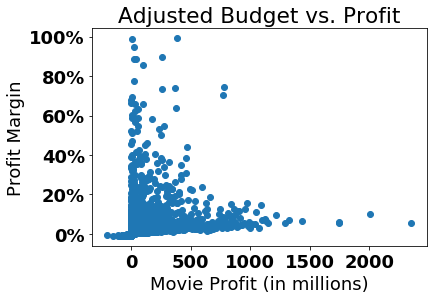

In [70]:
# That profit margin correlates with what production budget?
# Create the scatter plot
x = df_info[df_info['margin_percentage'] < 100]['movie_profit'] / 1000000
y = df_info[df_info['margin_percentage'] < 100]['margin_percentage']
fig, ax = plt.subplots()

# Graph X vs. Y as a scatter plot
ax.scatter(x, y)

# Set title
ax.set_title("Adjusted Budget vs. Profit")

# Set labels for X and Y axes
ax.set_xlabel("Movie Profit (in millions)")
ax.set_ylabel("Profit Margin")


import matplotlib.ticker as mtick
ax.yaxis.set_major_formatter(mtick.PercentFormatter())


Text(0, 0.5, 'Adjusted Budget (In Millions)')

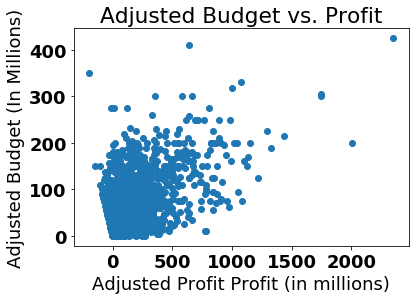

In [71]:
# Which budgets yield the highest profits?
# Create the scatter plot
x = df_info['movie_profit'] / 1000000
y = df_info['production_budget'] / 1000000
fig, ax = plt.subplots()

# Graph X vs. Y as a scatter plot
ax.scatter(x, y)

# Set title
ax.set_title("Adjusted Budget vs. Profit")

# Set labels for X and Y axes
ax.set_xlabel("Adjusted Profit Profit (in millions)")
ax.set_ylabel("Adjusted Budget (In Millions)")

Text(0.5, 1.0, 'Movie Budget vs Profit')

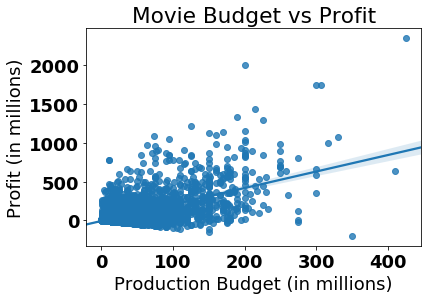

In [72]:
import seaborn as sns
df_info['production_budget_millions'] = df_info['production_budget'] / 1000000
df_info['movie_profit_millions'] = df_info['movie_profit'] / 1000000
sns.regplot(x = 'production_budget_millions', y = 'movie_profit_millions', data = df_info)
plt.xlabel('Production Budget (in millions)')
plt.ylabel('Profit (in millions)')
plt.title('Movie Budget vs Profit')


## Investigation 2: When is the most profitable time of year to release a film?
1. The holiday season is a profitable time of year to release a movie-particularly December. 

2. Late spring and early summer are also profitable seasons for movie releases.


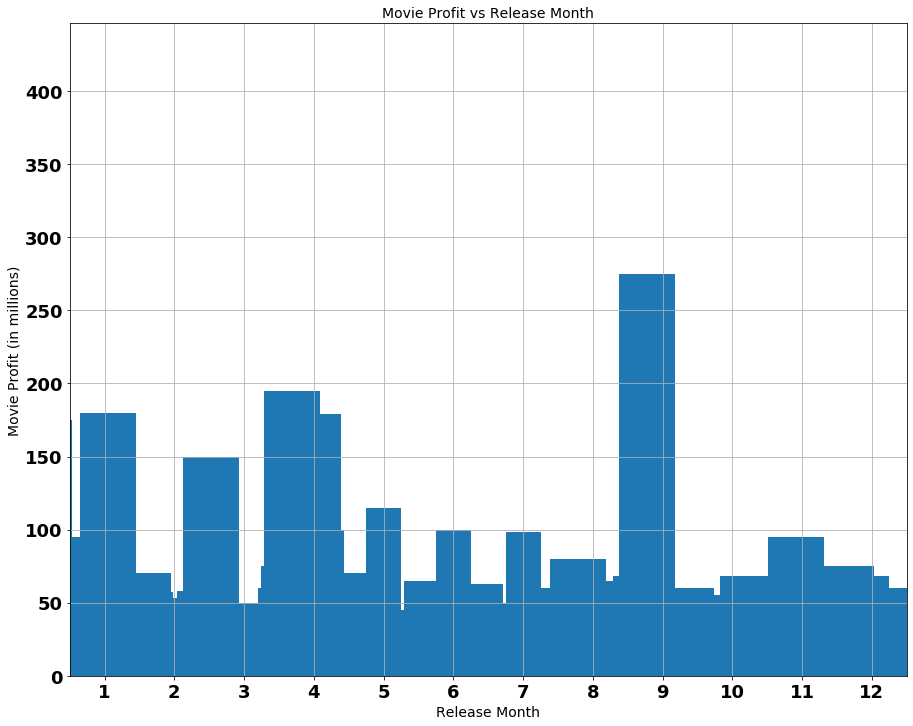

In [73]:
(df_info.groupby('month')['movie_profit'].mean()/1000000).plot(kind = 'bar', figsize=(15,12))
plt.xticks(rotation=0)
plt.bar(x, y)
plt.title('Movie Profit vs Release Month', fontsize=14)
plt.xlabel('Release Month', fontsize=14)
plt.ylabel('Movie Profit (in millions)', fontsize=14)
plt.grid(True)
plt.show()

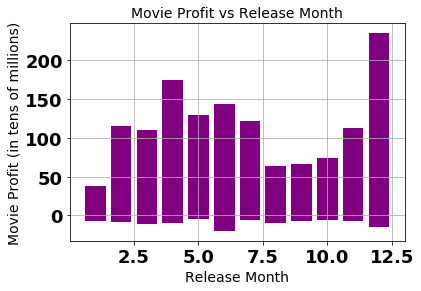

In [74]:
#When is the most profitable time of year to release a film?
import matplotlib.pyplot as plt

x = df_info['month']
y = df_info['movie_profit'] / 10000000

New_Colors = ['purple']
plt.bar(x, y, color=New_Colors)
plt.title('Movie Profit vs Release Month', fontsize=14)
plt.xlabel('Release Month', fontsize=14)
plt.ylabel('Movie Profit (in tens of millions)', fontsize=14)
plt.grid(True)
plt.show()

## Investigation 3: What are the production budgets and release dates of the top 10 most profitable movies?
Three bar graphs are shown below.

In [75]:
#Calculate the top 10 most profitable movies

top10 = df_info.movie_profit.value_counts().tail(10)
top10

88916299.000     1
109745279.000    1
39668350.000     1
73045328.000     1
1829464.000      1
69900000.000     1
1659955.000      1
1927779.000      1
376072059.000    1
-4416.000        1
Name: movie_profit, dtype: int64

In [76]:
#sum the totals for each movie
df_info.groupby(['movie_profit']).sum()

,id,production_budget,domestic_gross,worldwide_gross,month,margin_percentage,production_budget_millions,movie_profit_millions
movie_profit,,,,,,,,
-200237650.000,3,350000000.000,42762350.000,149762350.000,6,-0.572,350.000,-200.238
-150000000.000,95,150000000.000,0.000,0.000,12,-1.000,150.000,-150.000
-110450242.000,94,150000000.000,21392758.000,39549758.000,3,-0.736,150.000,-110.450
-106900000.000,42,110000000.000,3100000.000,3100000.000,6,-0.972,110.000,-106.900
-94635231.000,53,105000000.000,6712451.000,10364769.000,4,-0.901,105.000,-94.635
...,...,...,...,...,...,...,...,...
1433854864.000,34,215000000.000,652270625.000,1648854864.000,6,6.669,215.000,1433.855
1747311220.000,6,306000000.000,936662225.000,2053311220.000,12,5.710,306.000,1747.311
1748134200.000,7,300000000.000,678815482.000,2048134200.000,4,5.827,300.000,1748.134


In [77]:
#Sort and aggregate the data for the top 10 studios
df_agg = df_info.groupby(['movie']).agg('sum')

df_agg = df_agg.sort_values('movie_profit', ascending=False).head(10)

df_agg.index


Index(['Avatar', 'Titanic', 'Avengers: Infinity War',
       'Star Wars Ep. VII: The Force Awakens', 'Jurassic World', 'Furious 7',
       'The Avengers', 'Harry Potter and the Deathly Hallows: Part II',
       'Black Panther', 'Jurassic World: Fallen Kingdom'],
      dtype='object', name='movie')

In [78]:
#Change the font size for the plot so it is legible for the presentation
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

plt.rc('font', **font)

## What are the top 10 most profitable movies?
1. Gross revenue is broken into worldwide and domestic categories.
2. Avatar takes the top spot with an overall profit of 3.5  billion dollars.
3. The average gross profit for these films is 1.7 billion dollars


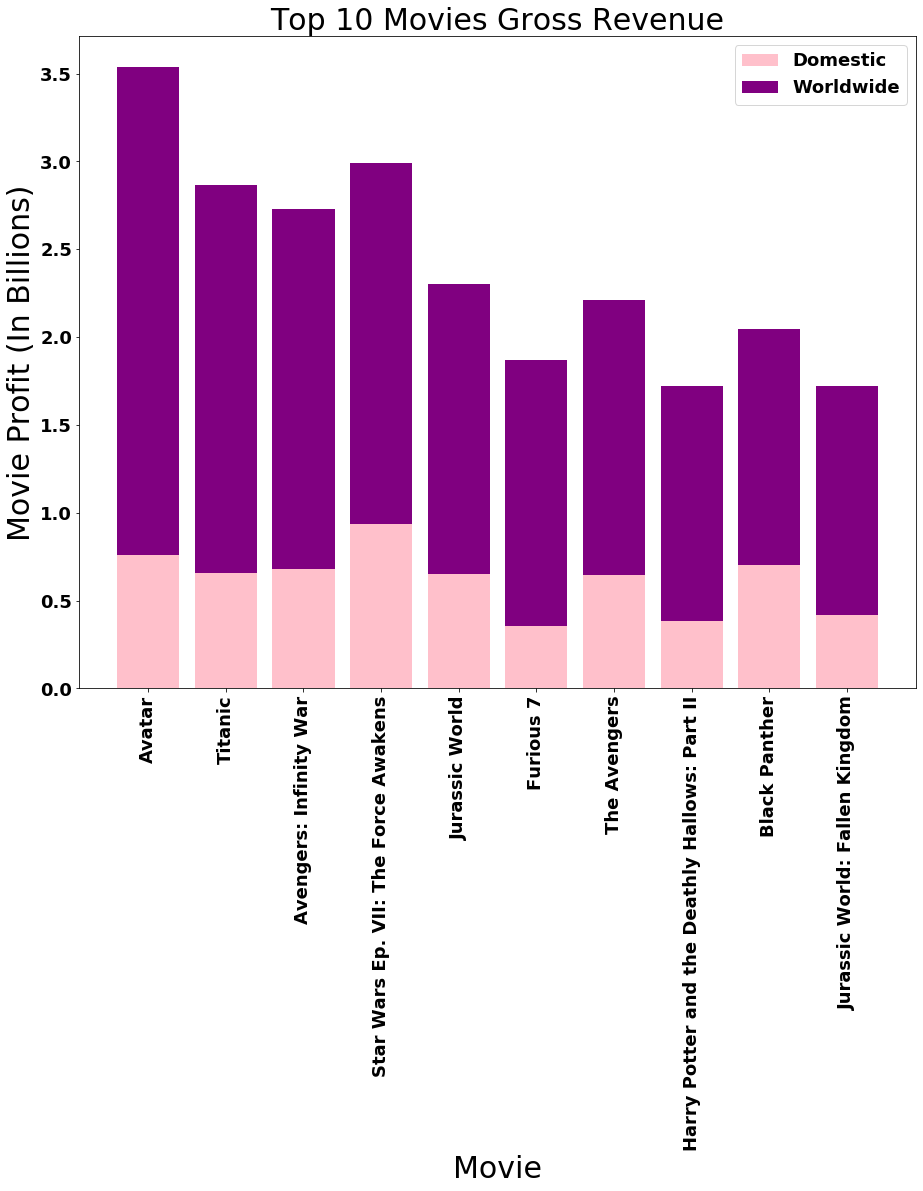

In [79]:
#Stacked Bar plot for top 10 studios' gross revenue, split worldwide and domestic
plt.figure(figsize=(15,12))

movie = df_agg.index
dom_gross = df_agg.domestic_gross / 1000000000
world_gross = df_agg.worldwide_gross / 1000000000

plt.bar(range(len(movie)), dom_gross, color='pink')
plt.bar(range(len(movie)), world_gross, color='purple', bottom=dom_gross)
plt.title('Top 10 Movies Gross Revenue', fontsize=30)
plt.xlabel('Movie', fontsize=30)
plt.ylabel('Movie Profit (In Billions)', fontsize=30)
plt.xticks(range(len(movie)), movie, rotation=90)

plt.legend(['Domestic', 'Worldwide'])
plt.show();

In [80]:
#Calculate the mean production budget of the top 10 movies
production_budget = df_agg.production_budget
production_budget.mean()

241600000.0

In [81]:
#Calculate the mean profit margin of the top 10 movies
margin = df_agg.margin_percentage
margin.mean()

6.848526228001896

In [82]:
profit = df_agg.worldwide_gross
profit.mean()

1781582224.5

In [83]:
budget = df_agg.production_budget
budget.describe()

count          10.000
mean    241600000.000
std      87324681.505
min     125000000.000
25%     192500000.000
50%     207500000.000
75%     296250000.000
max     425000000.000
Name: production_budget, dtype: float64

## What are the production budgets of the top 10 most profitable movies?
1. Avatar-our highest grossing movie-also had the highest production budget of $425,000,000

2. The average production budget for the top 10 movies is $242,600,000


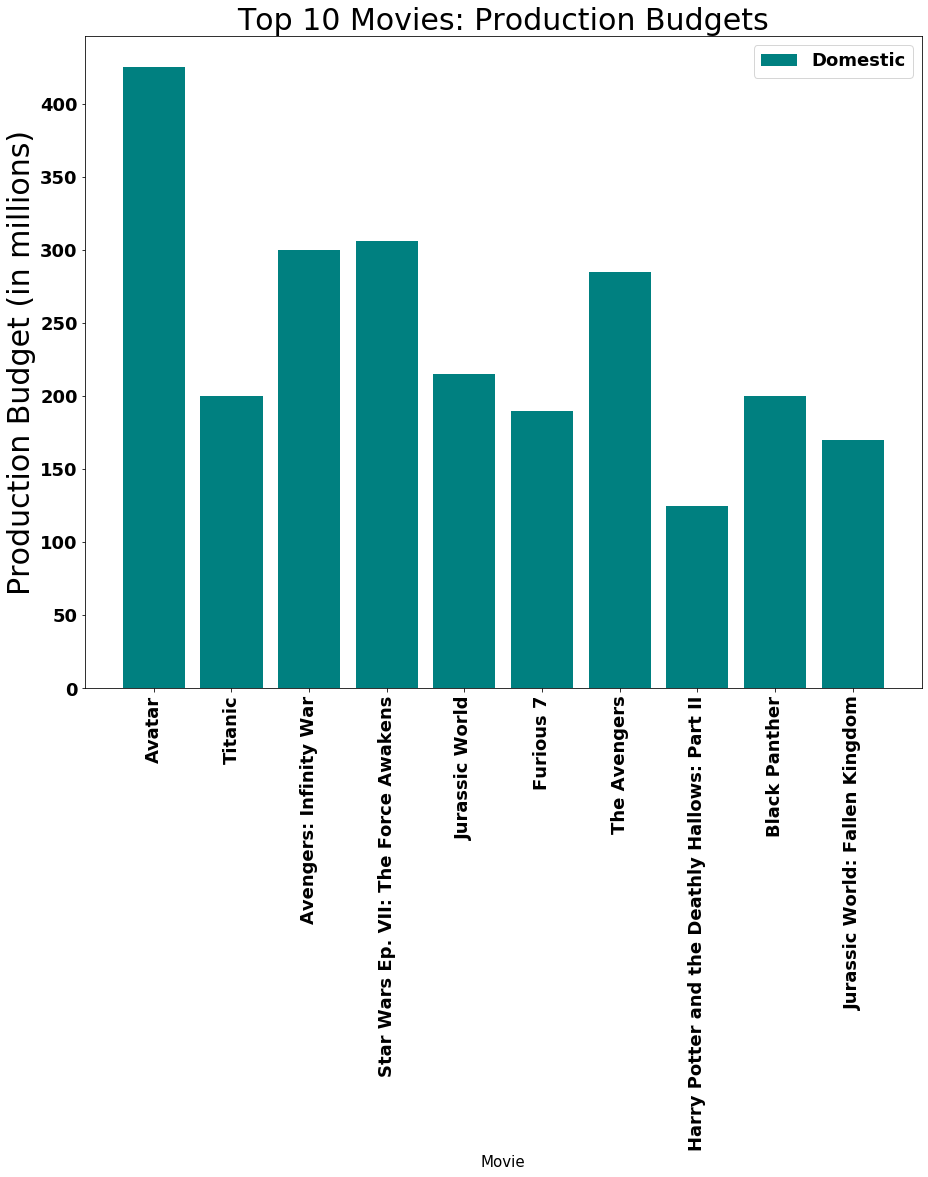

In [84]:
#Stacked Bar plot for top 10 studios' gross revenue, split worldwide and domestic
plt.figure(figsize=(15,12))

movie = df_agg.index
production_budget = df_agg.production_budget / 1000000

plt.bar(range(len(movie)), production_budget, color='teal')
plt.title('Top 10 Movies: Production Budgets', fontsize=30)
plt.xlabel('Movie', fontsize=15)
plt.ylabel('Production Budget (in millions)', fontsize=30)
plt.xticks(range(len(movie)), movie, rotation=90)

plt.legend(['Domestic', 'Worldwide'])
plt.show();

## What are the release dates of the top 10 most profitable movies?
1. Our top three highest grossing films-Avatar, Titanic, and Star Wars Episode VII-were released in December.

2. All other films in the “Top 10” were released in Spring or early Summer-the exception being Black Panther, which was released in February.


In [85]:
df_info.sort_values('movie_profit', ascending = False).head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,month,movie_profit,margin_percentage,production_budget_millions,movie_profit_millions
0,1,2009-12-18,Avatar,425000000.000,760507625.000,2776345279.000,12,2351345279.000,5.533,425.000,2351.345
42,43,1997-12-19,Titanic,200000000.000,659363944.000,2208208395.000,12,2008208395.000,10.041,200.000,2008.208
6,7,2018-04-27,Avengers: Infinity War,300000000.000,678815482.000,2048134200.000,4,1748134200.000,5.827,300.000,1748.134
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.000,936662225.000,2053311220.000,12,1747311220.000,5.710,306.000,1747.311
33,34,2015-06-12,Jurassic World,215000000.000,652270625.000,1648854864.000,6,1433854864.000,6.669,215.000,1433.855
66,67,2015-04-03,Furious 7,190000000.000,353007020.000,1518722794.000,4,1328722794.000,6.993,190.000,1328.723
26,27,2012-05-04,The Avengers,225000000.000,623279547.000,1517935897.000,5,1292935897.000,5.746,225.000,1292.936
260,61,2011-07-15,Harry Potter and the Deathly Hallows: Part II,125000000.000,381193157.000,1341693157.000,7,1216693157.000,9.734,125.000,1216.693
41,42,2018-02-16,Black Panther,200000000.000,700059566.000,1348258224.000,2,1148258224.000,5.741,200.000,1148.258
112,13,2018-06-22,Jurassic World: Fallen Kingdom,170000000.000,417719760.000,1305772799.000,6,1135772799.000,6.681,170.000,1135.773


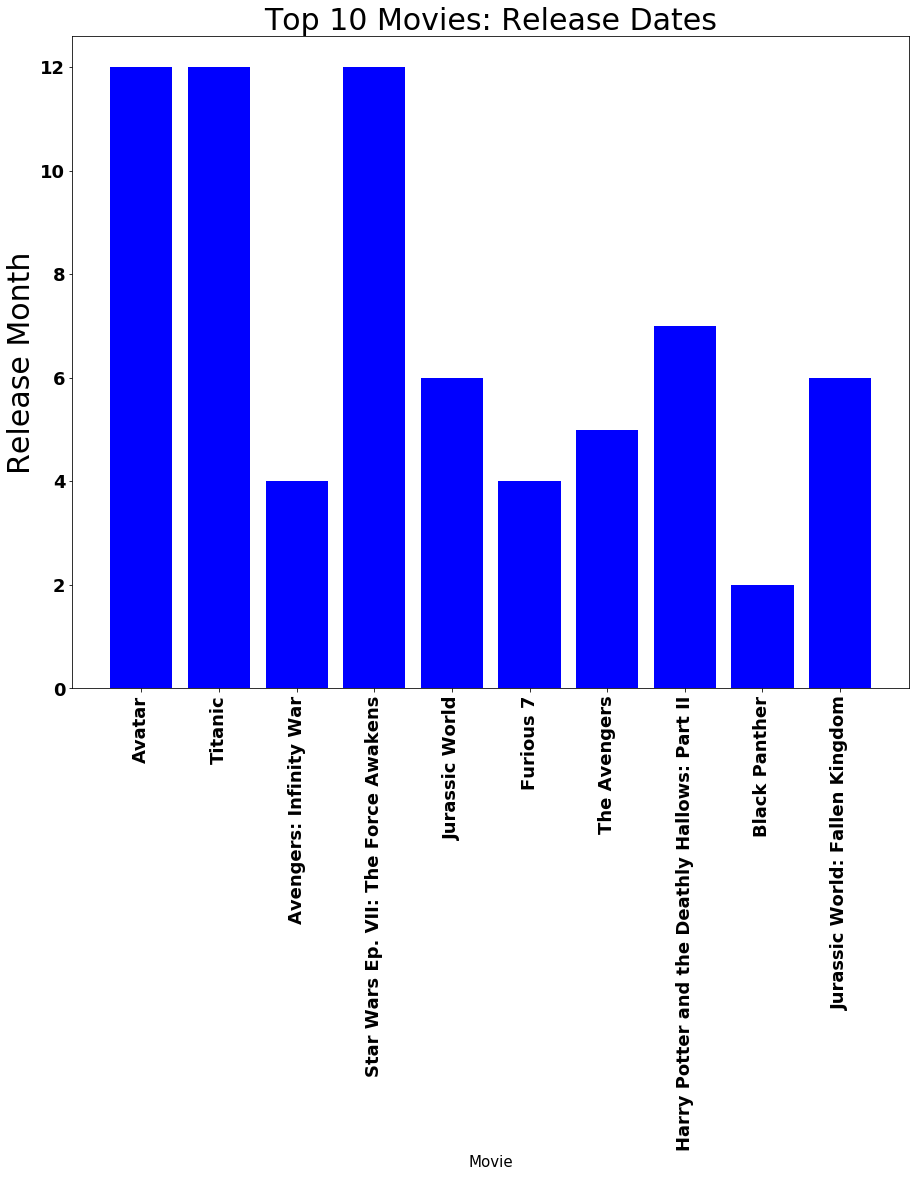

In [86]:
#Stacked Bar plot for top 10 studios' gross revenue, split worldwide and domestic
plt.figure(figsize=(15,12))

movie = df_info.sort_values('movie_profit', ascending = False).head(10)['movie']
month = df_info.sort_values('movie_profit', ascending = False).head(10)['month']

plt.bar(range(len(movie)), month, color='blue')
plt.title('Top 10 Movies: Release Dates', fontsize=30)
plt.xlabel('Movie', fontsize=15)
plt.ylabel('Release Month', fontsize=30)
plt.xticks(range(len(movie)), movie, rotation=90)


plt.show();

## Conclusion
1. Microsoft should release the bulk of their movies during the early summer and late fall months-ideally close to the holidays.

2. A minimum production budget of 50,000,000 is recommended for all movies. This amount correlates with an overall gross profit of 113,000,000 (44% margin)

3. If Microsoft wishes to compete with the Top 10, an average budget of $296,000,000 is recommended



## Follow-Up
For further analysis, Microsoft should research-in greater detail-the development behind the top ten most profitable movies, including budget breakdown, director selection, release date strategy, etc.
